# Creating an end-to-end automated trading system

What are we going to build?
---------------------------

A day trading system for trading in National Stock Exchange(NSE).

Orders would be placed at the start of the day and closed by the end of the day or exit by a stop loss. We would be using the end of the day data as our source data. 

The trading system has four distinct parts

1. Creating a trading strategy
2. Backtesting and simulation
3. Deploying the system and order execution
4. Evaluating the performance of the system


We follow a simple principle
> **Don't waste your money**

# Primer on financial concepts

A short primer on risk and return calculations. This is more of a practical explanation; so take it with a grain of salt.
 

## Putting it simply

> ### **Risk** is the amount of money you are willing to lose

> ### **Return** is the amount of money you expect to gain

A risk to return ratio of 1:2 mean you are willing to lose 1 rupee if you expect a gain of 2 rupees.

The risk-reward ratio is often misleading since

 * there are no probabilities attached to the risk and return
 * we strictly expect either we lose 1 or gain 2 but in practice we may end up between these two cases most of the time
 
So, we would be using **payoff** to evaluate strategies




Payoff is the amount of money you would expect to receive for the amount of investment made.

It is the average returns and losses multiplied by the probability of returns and losses. Let's look at an example

Let's assume a trading strategy with a risk-reward ratio of 1:2 with the following details

 * lose 1 - 30% of the time
 * gain 2 - 20% of the time
 * makes 0 - 50% of the time
 
Then the pay off is 

`-1*0.3 + 2*0.2 + 0*0.5 = 0.1`

So, you would making 0.1 for every rupee invested.

Payoff makes decision making easier. A positive payoff is favorable while a negative payoff is unfavorable

**Warning**

We expect these probabilities in the long run based on history. So, we would very well end up in loss in the short or medium term even if our probabilities turn out to be right.

### Rule 01

> ### Risk is very very personal

### Rule 02

> ### Returns are always expectations unless realized

### Return calculations

Return calculation is similar to net profit calculation

$Profit = Sell \ Value - Buy \ Value$

$Returns = \frac{Sell Value - Buy Value}{Buy Value}$

In case of annualized returns, then

$Annualized Returns = \frac{Sell Value - Buy Value}{Buy Value} * \frac{365}{holding\ period}$

 * Holding period is the period you held the investment
 * Buy and sell value is the quantity multiplied by average price
 




Warning
=========
 > Annualized return is not the actual return (unless the holding period is exactly 365 days). We are just proportionately calculating the returns based on the holding period. So if the holding period is 2 months, we assume we would get these returns for the rest of the year, which is quite impractical. Thus we must distinguish properly between holding period returns and annualized returns.
### Rule 03

> ### Know your assumptions and always write them down

**Example**

100 units of stock A is bought on 1st JAN 2019 for 2500 and sold on 25th MAR 2019 for 2620. Calculate the returns

In [1]:
import pandas as pd

# Inputs
buy_price = 2500
buy_date = pd.to_datetime('2019-01-01')
sell_price = 2620
sell_date = pd.to_datetime('2019-03-25')
qty = 100

# Calculations
buy_value = buy_price * qty
sell_value = sell_price * qty
holding_period = (sell_date - buy_date).days # Using pandas attribute to get the days

# Outputs
profit = sell_value - buy_value
returns = (sell_value - buy_value)/buy_value
annualized_return = returns * (365/holding_period)

print('Net profit  = {}'.format(profit))
print('Returns for the period = {:.2f}%'.format(returns*100))
print('Annualized returns = {:.2f}%'.format(annualized_return*100))

Net profit  = 12000
Returns for the period = 4.80%
Annualized returns = 21.11%


In [2]:
# Exercise 01 - Calculate the returns
# 1000 units of an index bought for 11000
# and sold for 12000 after holding for 60 days


In [3]:
# Exercise 02 - Calculate the returns
# 100 units of a stock bought on 1st JAN 2018 for 3400
# and sold for 3185 on 20th JULY 2019

## Leverage

**Leverage is a multiplier on your capital**.

Leverage is borrowing money so that you can get greater gains with your investment.

**Example**

You have 10000 and you buy 100 units of stock A at 100 and sell them at 110. 

Your profit is $(110-100)*100 = 1000$

Say you have a leverage of 5. This means you now have a capital of $5*10000=50000$ to invest. Now instead of 100, you could buy 500 units of Stock A. 

Now your profit is $(110-100)*500 = 5000$ 


### How leverage works?

Leverage is akin to borrowing in regular business. You borrow 40000 and then invest your 10000 capital. After the trade, you repay the borrowing and take away all the profit. In regular business, you pay interest on this borrowing and the loans are usually provided by the banks. In stock trading, this leverage is provided by the broker, and in most of the cases you get it for free (without interest) from your broker. Your broker provides it for free since you would be increasing your turnover; so the broker benefits from brokerage. It also provides better liquidity to the market due to more turnover with lesser investment.

**Leverage is a double-edged sword.** You can go down as fast as you go up and it may not be exactly linear all the time, making it difficult to comprehend.

### Rule 04

> If you are new to markets, don't leverage

Leverage doesn't change your profits but it changes your return percentage. Your returns and annualized returns get multiplied by the leverage. In our previous example, the returns would be 

<table>
    <thead>
        <th>Leverage</th>
        <th>Own Capital</th>
        <th>Borrowed</th>
        <th>Returns</th>
        <th>Annualized returns</th>
    </thead>
    <tbody>
        <tr>
            <td>1X</td>
            <td>250000</td>
            <td>0</td>
            <td>4.80%</td>
            <td>21.11%</td>
        </tr>
          <tr>
            <td>2X</td>
            <td>125000</td>
            <td>125000</td>
            <td>9.60%</td>
            <td>42.22%</td>          
        </tr>
        <tr>
            <td>5X</td>
            <td>50000</td>
            <td>200000</td>
            <td>24.00%</td>
            <td>105.54%</td>          
        </tr>
        <tr>
            <td>10X</td>
            <td>25000</td>
            <td>225000</td>
            <td>48.00%</td>
            <td>211.10%</td>          
        </tr>
    </tbody>
    
</table>

*Unless otherwise mentioned, there would be no leverage in our system*
    

## Short selling

In stock markets, you can sell stocks you don't have. This is called **short selling** and is allowed in intraday trading. This would change the return calculation as the denominator is replaced.

$Returns = \frac{Sell Value - Buy Value}{Sell Value}$

If you buy a stock first, it is called a **LONG position.**

If you sell a stock first(short selling), its called a **SHORT position.**


## Stop Loss

Stop loss is the amount at which you exit the order if a stock moves in the opposite direction. It is a loss protection mechanism.

$Stop Loss(BUY) = price*(1-stoploss)$

$Stop Loss(SELL) = price*(1+stoploss)$

**Example**

Price of Stock A is 100. Calculate stop loss at 2% for both BUY and SELL

In [4]:
price = 100
stop_loss = 2*0.01
buy_sl = 100*(1-stop_loss)
sell_sl = 100*(1+stop_loss)

print('Stop Loss 2% if stock is bought at 100 = {}'.format(buy_sl))
print('Stop Loss 2% if stock is sold at 100 = {}'.format(sell_sl))

Stop Loss 2% if stock is bought at 100 = 98.0
Stop Loss 2% if stock is sold at 100 = 102.0


In [5]:
# Exercise 03
# The price of stock A is 3450. 
# Calculate stop loss at 3.5% for both BUY and SELL


## A few more terms

**LIMIT order**
A limit order is executed exactly at the given price.

**MARKET order**
A market order is executed at the best available price.

**Costs**
Costs are other costs related to trading such as brokerage, statutory costs etc

**Slippage**
Slippage is the difference between our expected price and the executed price

## Data Collection and storage

We would be using data from the official [NSE Website](https://nseindia.com/). Only end of the day data for capital markets would be used; this file is called bhav copy. 

You could get the historical data from this [link](https://nseindia.com/products/content/equities/equities/archieve_eq.htm). NSE provides data for all the stocks. For this tutorial, files in the data directory would be used. These files are just a selected compilation from the files downloaded from the above link.

This data is used since it is provided officially by the NSE and is available for free for personal use. Using end of data could possibly save you from [survivorship bias](https://en.wikipedia.org/wiki/Survivorship_bias).

Index data could be obtained from this [site](https://www.niftyindices.com/).

Data could be stored flat files or in a database or a HDF5 file and all data would be loaded in memory before working on it.

## Trading strategy

And finally to begin with the trading strategy. 

### Assumptions

 * The strategy is purely intraday. Orders are placed at the start of the day and exit by the end of the day or by a stop loss. We have access to data including the preopen price. More on this [rationale here.](https://github.com/uberdeveloper/fastbt/blob/master/docs/rationale.md)
 * Capital is fixed during the entire period of backtesting
 * All stocks are ranked by a particular metric and the top or bottom n stocks are selected
 * All stocks are equi-weighted; capital is split equally among them.
 * All stocks have the same stop loss

### Why this method?

* Easy to get started and simple to implement
* Open source and reliable data
* Better liquidity since all positions are closed by the end of the day
* Maximum loss is fixed
* And last, but not least, **sleep peacefully**

### How to build a strategy?

* Start with a broad universe of stocks and their data
* Add necessary transformation in the form of [columns.](https://help.hacks.finance/columns.html)
* Add conditions (filters) in the form of strings
* Specify backtest parameters such as capital, stop loss, number of stocks
* Run the backtest and evaluate the results

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastbt.datasource import DataSource
from fastbt.rapid import backtest, metrics, price_sensitivity

import seaborn as sns
sns.set()

DataSource is an alternative to otherwise verbose pandas code specifically for financial data. It adds lags, percentage changes, indicators and more for all the stock symbols in a dataframe with fewer lines of code. You could look at the documentation [here.](https://help.hacks.finance/columns.html)

In [52]:
df = pd.read_csv('data/nifty_50.csv.zip', parse_dates=['timestamp'])
df['pret'] = df.eval('(open/prevclose)-1')
ds = DataSource(df)

# Add previous day return and preopen return
ds.add_pct_change(col_name='ret', lag=1)
ds.add_formula('(open/prevclose)-1', col_name='pret');

In [46]:
results = backtest(data=ds.data, stop_loss=2, sort_by='pret', order='B')
results.net_profit.sum()

56521.54999999945

We run the backtest

 * with a capital of 100000
 * by selecting the NIFTY 50 stocks
 * sort them by preopen return (from low to high)
 * select the top 5 stocks
 * exit them at a stop loss of 2%
 * repeat this for each day in the data
 
 

The Equity Curve
-----
Let's look at the equity curve.

An [equity curve](https://www.investopedia.com/terms/e/equity-curve.asp) is a graphical representation of the change in the value of a trading account over a time period

Text(0, 0.5, 'Equity')

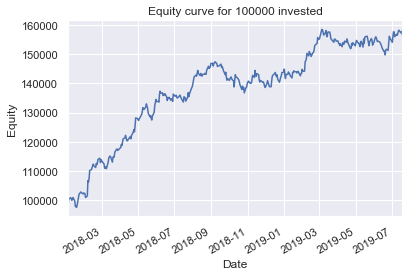

In [51]:
# Let's look the day-wise equity curve

net_profit = results.groupby('timestamp').net_profit.sum().cumsum()
equity_curve = 100000 + net_profit
equity_curve.plot(title='Equity curve for 100000 invested')
plt.xlabel('Date')
plt.ylabel('Equity')

In [6]:
metrics(results)

{'profit': 60435.80000000057,
 'commission': 0.0,
 'slippage': 0.0,
 'net_profit': 60435.80000000057,
 'high': 64005.85000000049,
 'low': -4095.2499999999754,
 'returns': 0.6043580000000057,
 'drawdown': -0.08210900000000015,
 'raw': 0.13711890188381015,
 'sharpe': 0.3600245976501391}

## Order generation

In [12]:
ACCOUNTID = 'XXXXXX' # Your accountId with broker

In [13]:
# List of columns to be included in the output

cols = [
    'Segment', 'InstrumentName', 'Symbol', 'Option Type', 'Strike Price',
    'ExpiryDate', 'Price', 'Qty', 'LTP', 'Buy/Sell', 'Order Type',
    'TriggerPrice', 'Pro/Cli', 'P Type', 'Validity', 'AccountId',
    'Validity Date', 'Remarks', 'Participant code', 'Validity Time',
    'Market Proc'    
]

# These columns are common for all orders - columns with a single name
columns = {
    'Segment': 'NSE',
    'InstrumentName': 'EQ',
    'Option Type': 'NA',
    'Strike Price': 'NA',
    'ExpiryDate': 'NA',
    'LTP': 0,
    'Disclosed Qty': 0,
    'AccountId': ACCOUNTID,
    'Pro/Cli': 'CLI',
    'Validity': 'DAY',
    'P Type': 'MIS',
    'Remarks': '',
    'Validity Date': 'NA',
    'Participant code': '',
    'Validity Time': 'NA',
    'Market Proc': 'NA',
    'Order Type': 'SL'
}

# These are columns to be renamed
rename = {
    'order': 'Buy/Sell',
    'price': 'Price',
    'qty': 'Qty',
    'trigger_price': 'TriggerPrice',
    'price': 'Price' ,
    'SYMBOL': 'Symbol'
}

In [14]:
# Generating orders in the required format
entry_orders = orders.copy()
entry = create_orders(entry_orders, rename=rename, **columns)

# Exit orders order type and price to be changed
exit_orders = orders.copy()
exit_orders['order'] = 'BUY'
exit_orders['price'] = 0
exit_orders['trigger_price'] = stop_loss(orders['price'], 3, order='S').round(2)
columns.update({'Order Type': 'SL-M'})
exit = create_orders(exit_orders, rename=rename, **columns)

# File generation
entry.append(exit, sort=False)[cols].to_csv('orders_to_place.csv', 
                   index=False, header=False)

print('File generated')

# If you want header change header to True
# If you want to export as excel use the to_excel function

NameError: name 'orders' is not defined

## Order generation for Kite Zerodha

1. Sign up for a zerodha publisher api key [here](https://kite.trade/)
2. Update the API key in the below cell
3. Run the below cells. It would create an html file **zerodha_order.html** in your present working directory.
4. Open the HTML file and click the submit button to log into zerodha and place your orders.

See the updated at time to make sure that this is the latest generated order.

In [ ]:
APIKEY = 'xxxxxxxxxxxxxxxx'

In [ ]:
# List of columns to be included in the output

cols = [
   'tradingsymbol', 'exchange', 'transaction_type', 'order_type',
    'quantity', 'product', 'validity', 'price', 'trigger_price'
]

# These columns are common for all orders - columns with a single name
columns = {
    'exchange': 'NSE',
    'product': 'MIS',
    'validity': 'DAY',
    'order_type': 'SL'
}

# These are columns to be renamed
rename = {
    'order': 'transaction_type',
    'price': 'Price',
    'qty': 'quantity',
    'trigger_price': 'trigger_price',
    'price': 'price' ,
    'SYMBOL': 'tradingsymbol'
}

In [ ]:
# Generating orders in the required format
entry_orders = orders.copy()
entry = create_orders(entry_orders, rename=rename, **columns)

# Exit orders order type and price to be changed
exit_orders = orders.copy()
exit_orders['order'] = 'BUY'
exit_orders['price'] = 0
exit_orders['trigger_price'] = stop_loss(orders['price'], 3, order='S').round(2)
columns.update({'order_type': 'SL-M'})
exit = create_orders(exit_orders, rename=rename, **columns)
trades = entry.append(exit, sort=False)[cols].to_dict(orient='records')

In [ ]:
import json
from jinja2 import Environment, FileSystemLoader
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template('template.html')
output_from_parsed_template = template.render(api_key = APIKEY,
                                              orders=json.dumps(trades), 
                                              date=str(datetime.datetime.now()))

with open('zerodha_order.html', 'w') as f:
    f.write(output_from_parsed_template)
    print('Zerodha order file generated')